# Задание 1
Определить два вектора, представляющие собой число автомобилей, припаркованных в течении
5 рабочих дней у бизнес-центра на уличной стоянке и в подземном гараже

| День | Улица | Гараж |
| :-: | :--: | :--: |
| Понедельник | 80 | 100 |
| Вторник | 98 | 82 |
| Среда | 75 | 105 |
| Четверг | 91 | 89 |
| Пятница | 78 | 102

Найти и интерпретировать корреляцию между переменными «Улица» и
«Гараж» (подсчитать корреляцию по Пирсону).

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [36]:
df_cars = pd.DataFrame({'День': ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', ],
                        'Улица': [80, 98, 75, 91, 78],
                        'Гараж': [100, 82, 105, 89, 102],
                        })
print(df_cars)

vector1 = np.array(df_cars['Улица'])
vector2 = np.array(df_cars['Гараж'])
print('Коррелляция по Пирсону: ', np.corrcoef(vector1, vector2)[0, 1])

          День  Улица  Гараж
0  Понедельник     80    100
1      Вторник     98     82
2        Среда     75    105
3      Четверг     91     89
4      Пятница     78    102
Коррелляция по Пирсону:  -0.9999999999999998


# Задание 2
Построить диаграмму рассеяния

Text(0, 0.5, 'В гараже')

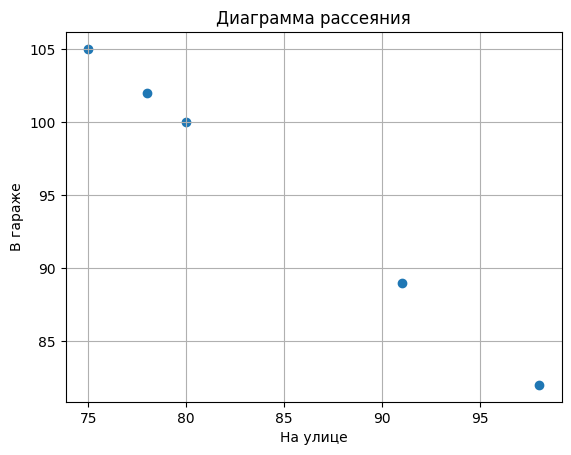

In [37]:
plt.scatter(vector1, vector2)
plt.grid(True)
plt.title('Диаграмма рассеяния')
plt.xlabel('На улице')
plt.ylabel('В гараже')

# Задание 3
Загрузить bitcoin.csv.

In [47]:
df_bitcoin = pd.read_csv('bitcoin.csv')
df_bitcoin

y_test = df_bitcoin[-14:]['close']
print(y_test)

1987    34611.58
1988    35662.59
1989    37290.83
1990    36683.51
1991    37576.98
1992    39229.66
1993    36861.50
1994    35538.40
1995    35798.57
1996    33582.86
1997    33409.38
1998    37391.58
1999    36680.78
2000    36843.33
Name: close, dtype: float64


# Задание 4
Убрать из данных для обучения модели последние 14 дней.

In [46]:
#Нормализация данных
df_bitcoin['volumeto'] = np.array(df_bitcoin['volumeto'], type(float))

df_bitcoin.drop(df_bitcoin.tail(14).index, inplace=True)
df_bitcoin

1959    57843.16
1960    56623.51
1961    57195.07
1962    53244.07
1963    57506.88
1964    56441.94
1965    57374.33
1966    58943.13
1967    58294.18
1968    55870.01
1969    56747.52
1970    49504.08
1971    49700.60
1972    49887.96
Name: close, dtype: float64


,Unnamed: 0,time,high,low,open,volumefrom,volumeto,close
0,0,2015-12-20,462.76,431.10,461.20,121531.64,54316484.95,441.78
1,1,2015-12-21,445.54,423.99,441.78,121990.88,53270215.6,437.59
2,2,2015-12-22,443.22,433.25,437.59,65785.54,28845536.39,437.03
3,3,2015-12-23,444.78,434.28,437.03,63247.04,27877349.1,442.43
4,4,2015-12-24,460.62,441.76,442.43,79604.01,36096662.15,452.98
...,...,...,...,...,...,...,...,...
1954,1954,2021-04-26,54389.71,48843.41,49120.97,61603.50,3254396664.97,54062.29
1955,1955,2021-04-27,55490.94,53357.59,54062.29,40602.56,2220077233.11,55073.48
1956,1956,2021-04-28,56461.55,53886.63,55073.48,42647.15,2339383717.48,54877.94
1957,1957,2021-04-29,55217.24,52399.42,54877.94,43948.76,2359198137.55,53581.58


# Задание 5
 Предсказать стоимость криптовалюты на следующие 14 дней с помощью линейной регрессии.

In [44]:
#Присваивание значений параметрам регрессии
x_train = df_bitcoin[:-14].drop(['close', 'time', 'Unnamed: 0'], axis=1)
x_test = df_bitcoin[-14:].drop(['close', 'time', 'Unnamed: 0'], axis=1)
y_train = df_bitcoin[:-14]['close']
y_test = df_bitcoin[-14:]['close']

print(y_test)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


1973    46775.29
1974    46490.71
1975    43552.14
1976    42886.02
1977    36771.87
1978    40597.40
1979    37350.39
1980    37491.50
1981    34716.84
1982    38837.76
1983    38387.36
1984    39295.08
1985    38538.84
1986    35680.92
Name: close, dtype: float64


# Задание 6
С помощью коэффициента детерминации сравнить исходные данные 14-ти последних дней, которые были обрезаны перед обучением модели, и 14 дней, которые предсказала модель.

# Задание 7
Вывести угол наклона и y-перехват.

# Задание 8
Построить диаграмму рассеяния (ось х – это close, ось y – это предсказанные моделью close).

# Задание 9
Загрузить housePrice.csv

# Задание 10
Произвести предобработку данных.

# Задание 11
Реализовать линейную регрессию вручную, без использования библиотеки.

# Задание 11
Вывести угол наклона и y-перехват.

# Задание 12
Вывести угол наклона и y-перехват.

# Задание 13
Построить диаграмму.